I finished the [Data Management and Visualisation course](https://www.coursera.org/learn/data-management-visualization/home/welcome) on coursera around a week ago (while on vacation) with full marks on [this post](http://lilithelina.tumblr.com/post/130899449414/data-visualisation-python), but there's something more I want to show you in my **"Breast Cancer Causes Internet Usage!"** visualisation before starting on the [Data Analysis](https://www.coursera.org/learn/data-analysis-tools/) part.  
As before, the output will look lots better in the [nbviewer](http://nbviewer.ipython.org/github/LilithElina/Data-Management-and-Visualization/blob/master/Week%20Four-Addendum.ipynb) than on tumblr.

First up comes all the code I created before, including the figures.

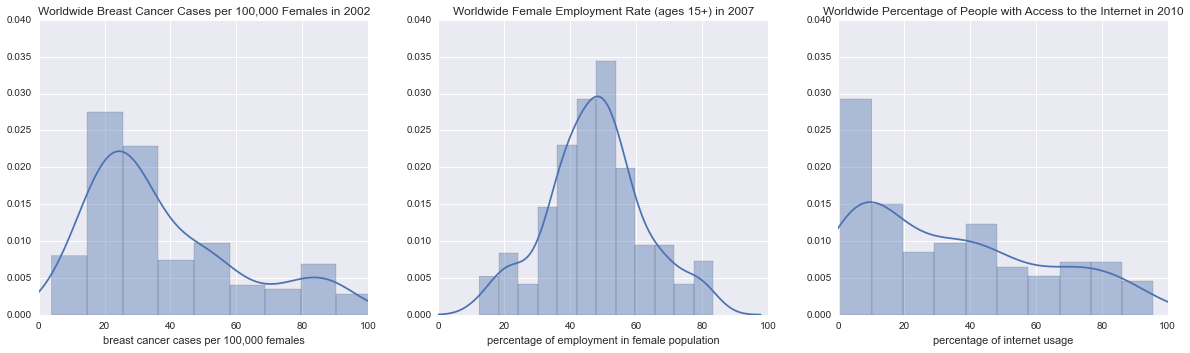

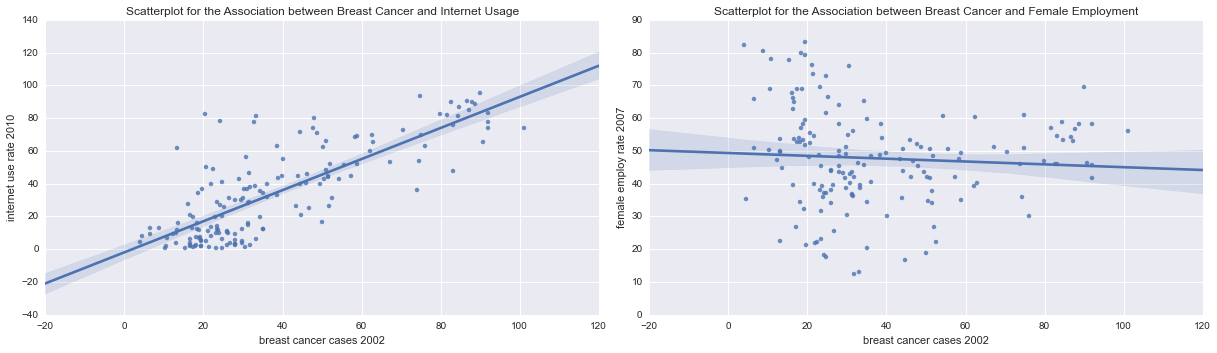

In [1]:
# activate inline plotting, should be first statement
%matplotlib inline

# load packages
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import warnings                   # ignore warnings (e.g. from future, deprecation, etc.)
warnings.filterwarnings('ignore') # for layout reasons, after I read and acknowledged them all!

# read in data
data = pandas.read_csv("gapminder.csv", low_memory=False)

# subset the data and make a copy to avoid error messages later on
sub = data[["country", "breastcancerper100th", "femaleemployrate", "internetuserate"]]
sub_data = sub.copy()

# change data types to numeric
sub_data["breastcancerper100th"] = sub_data["breastcancerper100th"].convert_objects(convert_numeric=True)
sub_data["femaleemployrate"] = sub_data["femaleemployrate"].convert_objects(convert_numeric=True)
sub_data["internetuserate"] = sub_data["internetuserate"].convert_objects(convert_numeric=True)

# remove rows with missing values
sub2 = sub_data.dropna()
sub_data2 = sub2.copy()

# create five equal-sized groups per variable
sub_data2['breastGroup'] = pandas.qcut(sub_data2.breastcancerper100th, 5)
sub_data2['employGroup'] = pandas.qcut(sub_data2.femaleemployrate, 5)
sub_data2['internGroup'] = pandas.qcut(sub_data2.internetuserate, 5)

# plot univariate histograms
fig = plt.figure(figsize=(17,5)) # to use add_subplot() to save space

fig.add_subplot(131)
seaborn.distplot(sub_data2["breastcancerper100th"]);
plt.xlabel('breast cancer cases per 100,000 females');
plt.title('Worldwide Breast Cancer Cases per 100,000 Females in 2002');
plt.xlim(0,100)
plt.ylim(0,0.04)

fig.add_subplot(132)
seaborn.distplot(sub_data2["femaleemployrate"]);
plt.xlabel('percentage of employment in female population');
plt.title('Worldwide Female Employment Rate (ages 15+) in 2007');
plt.xlim(0,100)
plt.ylim(0,0.04)

fig.add_subplot(133)
seaborn.distplot(sub_data2["internetuserate"], bins=10);
plt.xlabel('percentage of internet usage');
plt.title('Worldwide Percentage of People with Access to the Internet in 2010');
plt.xlim(0,100)
plt.ylim(0,0.04)

fig.tight_layout() # for better layout
plt.show()

# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="breastcancerper100th", y="internetuserate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('internet use rate 2010');
plt.title('Scatterplot for the Association between Breast Cancer and Internet Usage');

fig.add_subplot(122)
seaborn.regplot(x="breastcancerper100th", y="femaleemployrate", fit_reg=True, data=sub_data2);
plt.xlabel('breast cancer cases 2002');
plt.ylabel('female employ rate 2007');
plt.title('Scatterplot for the Association between Breast Cancer and Female Employment');

fig.tight_layout()
plt.show()

What I wanted to show you is another nice `seaborn` plotting function: `pairplot`, which I saw used [here](http://tsnitz.tumblr.com/post/130568775513/assignment-4-creating-graphs-for-your-data). It plots histograms and scatterplots of all variables with all variables in a nice grid, which means I get all the plots from above, plus the missing relationship between internet usage and female employment rate.

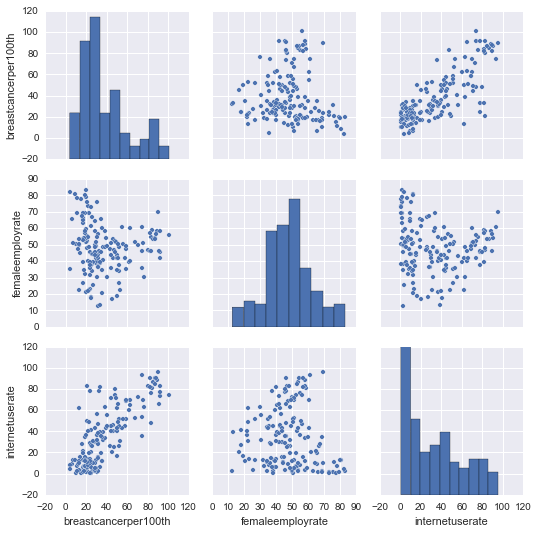

In [2]:
seaborn.pairplot(sub_data2);

What is the first thing you notice?  
Ignoring all the things I've discussed [already](http://lilithelina.tumblr.com/post/130899449414/data-visualisation-python), what I find most interesting here is the column containing the female employment rates from 2007 (middle). As described before, this is the only variable that is not right skewed, but looks more normally bell-shaped (middle histogram).  
Look at the two scatterplots in that column. They look fairly similar - a bit like a wave about to break. Remember how I discussed one of the two already? The relationship between breast cancer cases and female employment rate seemed non-existent to me, because I had the breast cancer cases on the x axis. Looking at the same relationship, just turned 90 degrees, though, gives a different picture I probably should have seen before. It's not a linear relationship, because apparently some countries with high female employment rates have either many or very few breast cancer cases diganosed. And (not surprisingly given the linear relationship between breast cancer and internet usage) the same is true for people with access to the internet: either a lot or almost none at high female employment rates. How can we interpret that? Maybe countries where many women are working are either well-developed countries where women want (professional) success (and get breast cancer check-ups, and have access to the internet), or very poor countries (with almost no internet or healthcare) where women *have* to work.

In the course we learned that, in cases when a scatterplot is difficult to interpret, it helps to convert the explanatory variable to caterogical instead of quantitative. Their example was the HIV rate over income per person - most countries have a low HIV rate, resulting in the data points "clumping" in the lower part of the graph. Having the income grouped into quartiles helped reveal a linear relationship, though the differences in HIV rate percentages were quite low.  
We can split the female employment rate in the same way, and see if this will make this "wave like" relationship more clear.

female employment rate - 4 categories - quartiles
25%tile     41
50%tile     40
75%tile     40
100%tile    41
dtype: int64


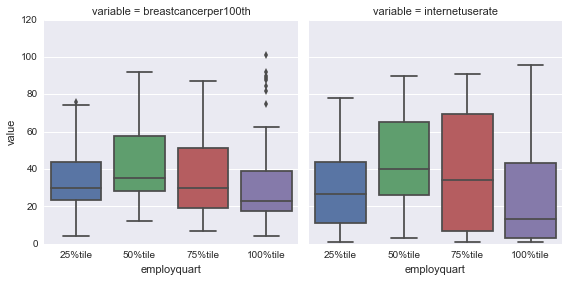

In [3]:
# quartile split (use qcut function & ask for 4 groups - gives you quartile split)
print('female employment rate - 4 categories - quartiles')
sub_data2['employquart'] = pandas.qcut(sub_data2.femaleemployrate, 4,
                                             labels=["25%tile", "50%tile", "75%tile", "100%tile"])
print(sub_data2['employquart'].value_counts(sort=False, dropna=True))

# "melt" the data into better (long) format for factorplot()
sub_data2.m = pandas.melt(sub_data2, id_vars=["employquart"], value_vars=["breastcancerper100th", "internetuserate"])

# plot (setting order manuallyto avoid weird automatic order)
seaborn.factorplot(x='employquart', y='value', col="variable", data=sub_data2.m,
                   kind="box", ci=None, x_order=['25%tile', '50%tile', '75%tile', "100%tile"]);

The four categories into which the female employment rate was split are - as expected - of almost equal size. The course suggests to use bar charts for visualisation, but if there's a chance to use a boxplot I prefer that, like, *a lot*. Therefore, above you can see the distribution of breast cancer cases and internet usage over the quartiles I use to categorise the female employment rate. The coloured boxes range from the first (25th percentile) to the third (75th percentile) quartile of the qualitative data, with a line at the 50th percentile (median). The whiskers contain the rest of the data, except for far outliers shown as individual dots.  
We can see that the median is in both cases highest at the 50th percentile of the female employment rate, though the differences are not too great (mostly between 20 and 40, either breast cancer cases per 100,000 women or percent of people with access to the internet). Furthermore, the interquartile ranges (IQR, coloured boxes) almost always span all medians. The exception for both of these descriptions is the internet usage at the 100th percentile of the female employment rate, which has a lower median, but the highest whisker range.  
I didn't expect any significant differences here, and there's no interpretation I could offer right now, but it's nice to be able to display data in different ways.

Apropos displaying data in different ways: now that I have the quartiles for female employment rate, I can use them to colour the `pairplot` from above:

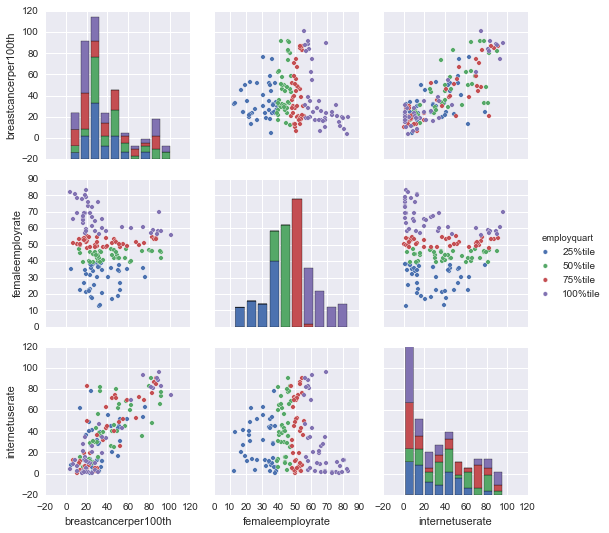

In [4]:
seaborn.pairplot(sub_data2, hue="employquart");

In the middle histogram, we can see how the qualitative data was categorised: the highest bar in the histogram (around 50% female employment) contains most of the 75th percentile; countries with more than 50% of women working belong to the 100th percentile, while the 50th percentile comprises a female employment rate around 40%.  
This colouring shows, in the other histograms, that mostly all female employment categories appear in all bars for the other variables, though in different amounts and with the lowest employment group missing for highest other values. The scatterplots comparing female employment with the other two variables show how the two middle categories still comprise a wide range of internet use rates or breast cancer cases, since half of all observations are contained in this small space. The wider outer categories contain values from nearly the same range, only more spread out (the 25th percentile is a bit more focussed on lower y values, though, as already notices in the histograms). In the scatterplots between breast cancer cases and internet usage, the caterogical colours are very mixed.  
All in all, there doesn't seem to be a significant relationship between the female employment rate and either breast cancer cases or the internet usage rate of a country.